In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ML for Decision Trees
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz as gv

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Read the dataset
df9 = pd.read_csv(r'/home/collins/Documents/Pythonb/heart_disease.csv')
df9.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
"""
cp = chest pain
testbps = resting blood pressure
chol = cholesterol
fbs = fasting blood sugar
restecg = resting electrocardiography
exang = exercise induced agina
oldspeak = STdepression induced
slope = the slope of the peak exercise
ca = number of major vessel
thal = normal, fixed defext, reversible defect
target =have disease or not
"""

'\ncp = chest pain\ntestbps = resting blood pressure\nchol = cholesterol\nfbs = fasting blood sugar\nrestecg = resting electrocardiography\nexang = exercise induced agina\noldspeak = STdepression induced\nslope = the slope of the peak exercise\nca = number of major vessel\nthal = normal, fixed defext, reversible defect\ntarget =have disease or not\n'

In [4]:
#Show number of people with and without the disease
df9.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [5]:
#Show male and female
count_female = len(df9[df9.sex == 0])
count_male = len(df9[df9.sex == 1])
print('Percentage of Female: {:.2f}%'.format(count_female/(len(df9.sex))*100))

Percentage of Female: 30.44%


In [6]:
#Getting the mean
df9.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


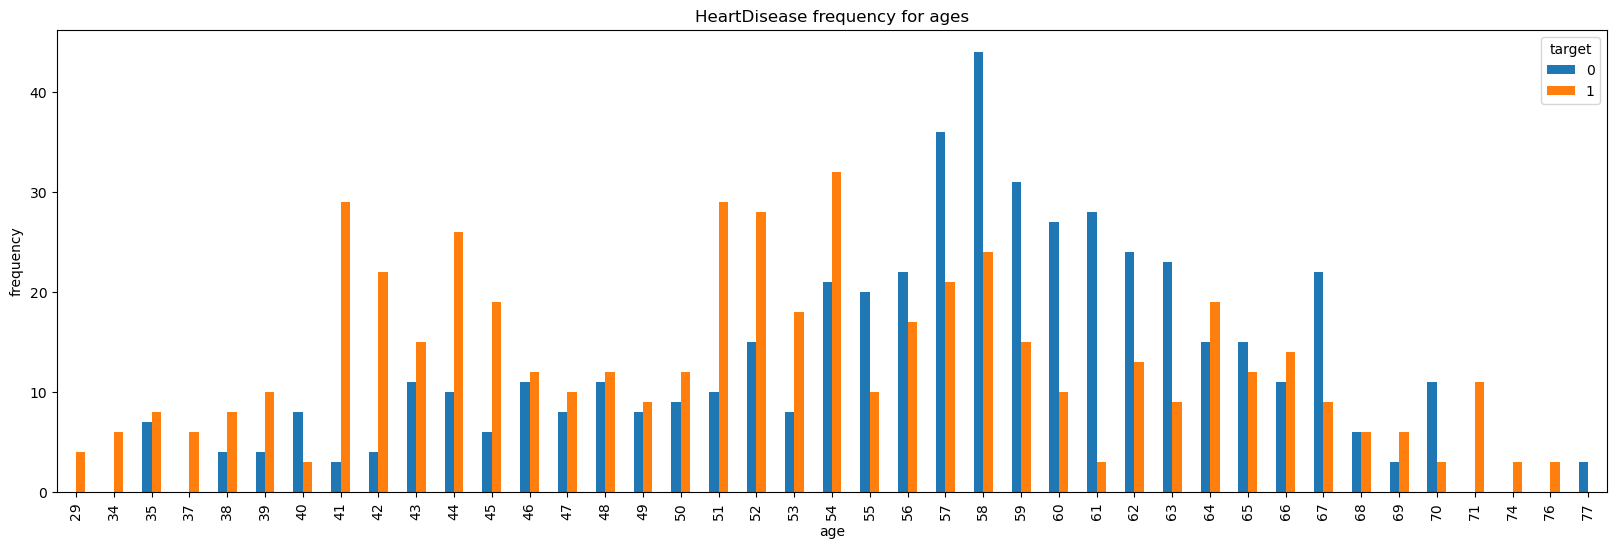

In [7]:
#Data visualisation of heart disease frequency for age
pd.crosstab(df9.age, df9.target).plot(kind='bar', figsize=(20,6))
plt.title('HeartDisease frequency for ages')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

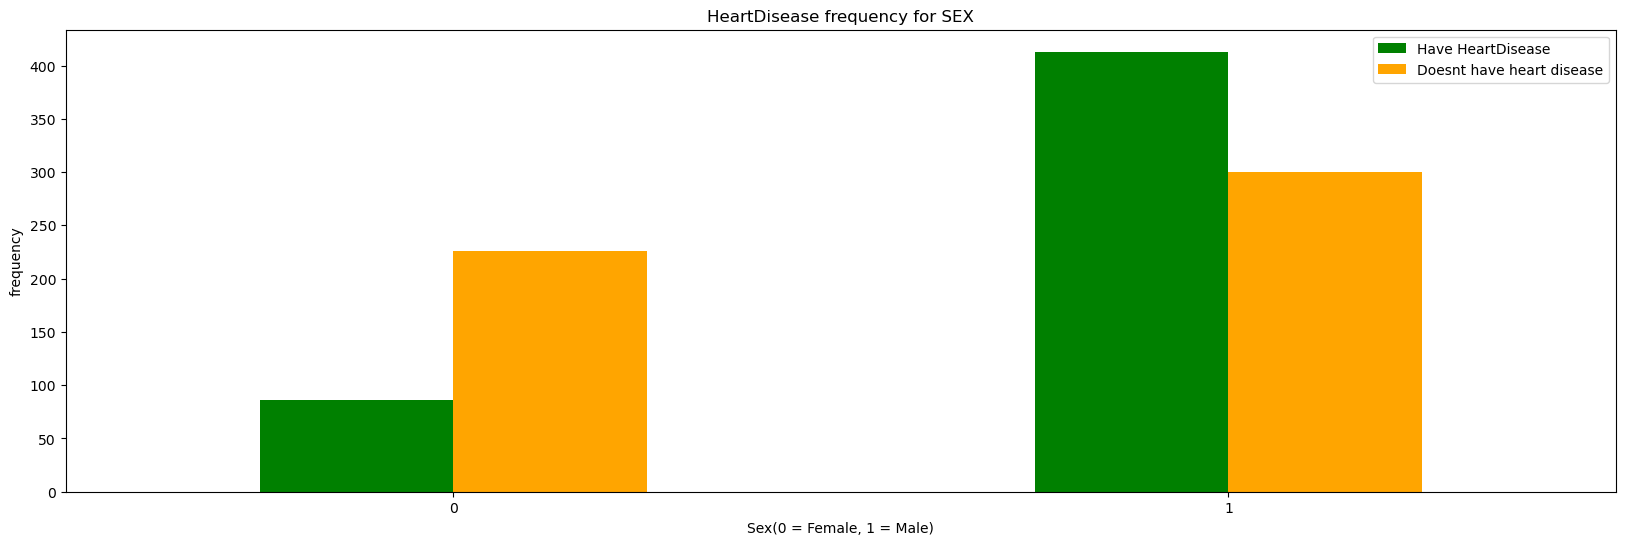

In [8]:
#Data visualisation of heart disease frequency for sex
pd.crosstab(df9.sex, df9.target).plot(kind='bar', figsize=(20,6), color=['#008000', '#FFA500'])
plt.title('HeartDisease frequency for SEX')
plt.xlabel('Sex(0 = Female, 1 = Male)')
plt.legend(['Have HeartDisease', 'Doesnt have heart disease'])
plt.ylabel('frequency')
plt.xticks(rotation=0)
plt.show()

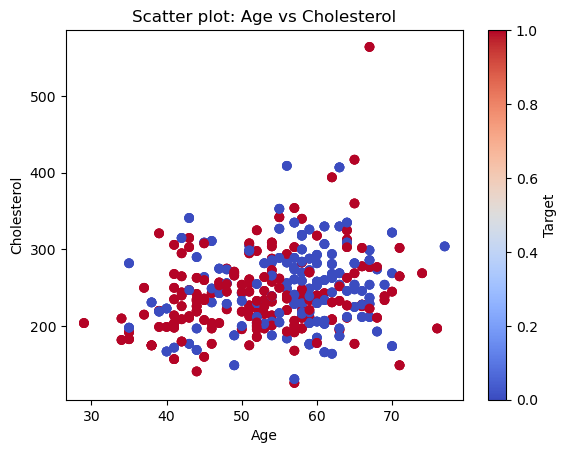

In [9]:
#Data visualisation of heart disease frequency for sex
age = df9['age']
chol = df9['chol']

plt.scatter(age, chol, c=df9['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter plot: Age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()

In [10]:
#Categorical variable of the dataset:
cat = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
#Numerical variable of the dataset:
num = ['age','trestbps','chol','thalach','oldpeak']

In [11]:
all_numeric = df9[num]
cor = all_numeric.corr()

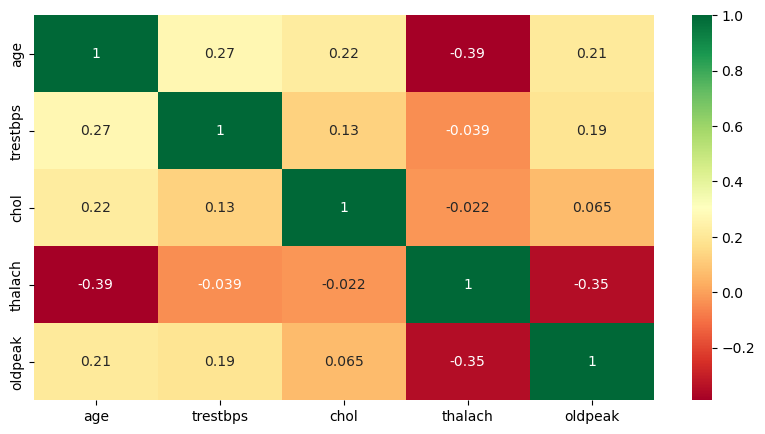

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(cor,cmap = "RdYlGn",annot=True)
plt.show()



array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

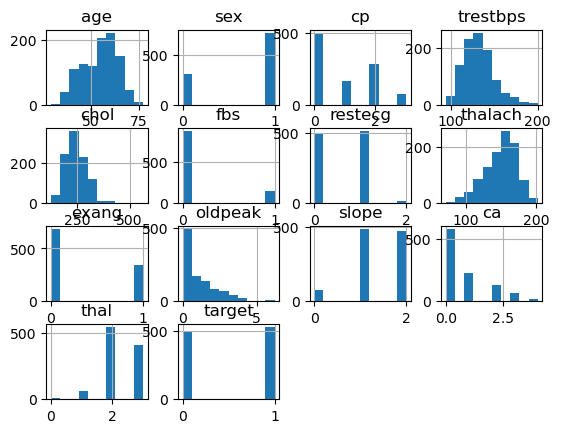

In [13]:
# Explore the distributions of the variables
df9.hist()

In [14]:
# Plot the relationships between the variables
#sns.pairplot(df9)

In [15]:
# Split the data into train, test, and validation sets
X = df9.drop('target', axis=1)
y = df9['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [16]:
# Display the columns of the different sets
print('Shape in train set:', X_train.shape)
print('Shape in test set:', X_test.shape)
print('Shape in validation set:', X_val.shape)


Shape in train set: (615, 13)
Shape in test set: (205, 13)
Shape in validation set: (205, 13)


# Training the model using Decision Tree Classifier

In [17]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [18]:
# Train the classifier on the train set
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
print('Accuracy on test set:', accuracy_dt)

Accuracy on test set: 0.9707317073170731


In [20]:
# Evaluate the classifier on the validation set
y_pred_val = clf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print('Accuracy on validation set:', accuracy_val)

Accuracy on validation set: 0.9463414634146341


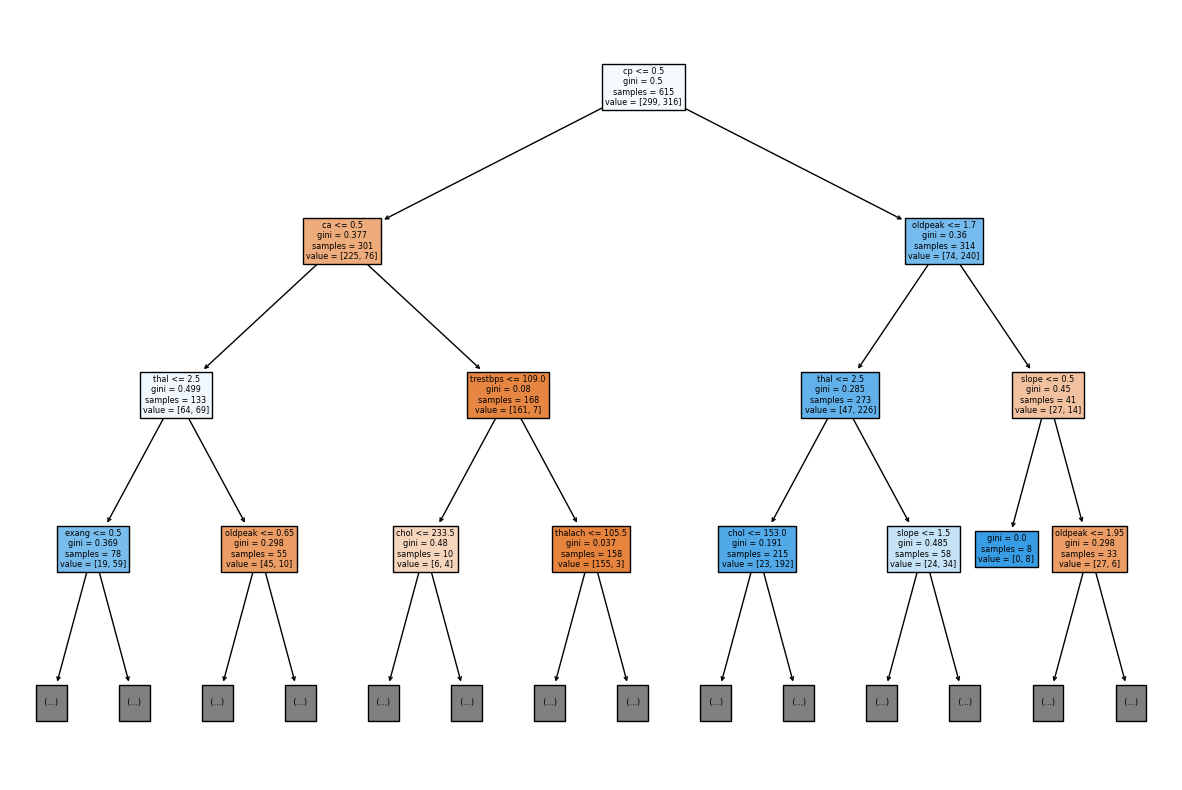

In [21]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X_train.columns, max_depth=3, filled=True)
plt.show()

In [22]:
#Export the decision tree to a dot file
dot_data = export_graphviz(clf, feature_names=X_train.columns, filled=True)

In [23]:
# Create a graph object from the dot data
graph = gv.Source(dot_data)

In [24]:
# Save the graph as a PNG file and pdf 
graph.render('heart_decision_tree.png')

'heart_decision_tree.png.pdf'

In [25]:
# Save the dot file
with open('heart_decision_tree.dot', 'w') as f:
    f.write(dot_data)


# Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [28]:
# Display the columns of the different sets
print('Shape in train set:', X_train.shape)
print('Shape in test set:', X_test.shape)
print('Shape in validation set:', X_val.shape)


Shape in train set: (615, 13)
Shape in test set: (205, 13)
Shape in validation set: (205, 13)


In [29]:
# Create a logistic regression classifier
logm = LogisticRegression(random_state=42)

In [30]:
# Train the classifier on the train set
logm.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [31]:
# Evaluate the classifier on the test set
y_pred = logm.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred)
print('Accuracy on test set:', accuracy_log)

Accuracy on test set: 0.8048780487804879


In [32]:
# Evaluate the classifier on the validation set
y_pred_val = logm.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print('Accuracy on validation set:', accuracy_val)

Accuracy on validation set: 0.9073170731707317


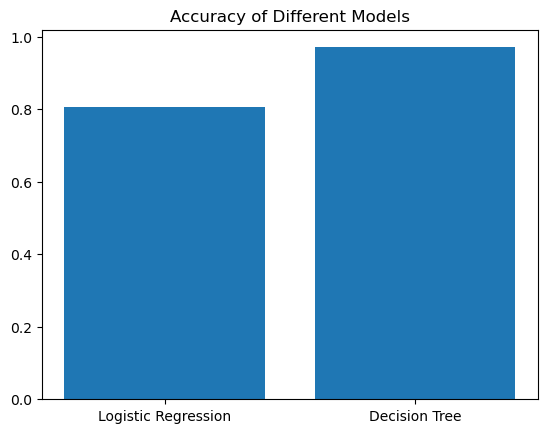

In [33]:
# Create a barplot to compare the accuracies of the two models
acc = [accuracy_log, accuracy_dt]
models = ['Logistic Regression', 'Decision Tree']
plt.bar(models, acc)
plt.title('Accuracy of Different Models')
plt.show()

# K-NEAREST NEIGHBOUR model

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [35]:
# Create a k-nearest neighbor regressor
knn = KNeighborsRegressor(n_neighbors=3)


In [36]:
# Train the regressor on the train set
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [37]:
# Evaluate the regressor on the test set
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE on test set:', mse)
score_knn = knn.score(X_test, y_test)
print('Test accuracy:', score_knn)


MSE on test set: 0.14146341463414633
Test accuracy: 0.4341328764515513


In [38]:
# Evaluate the regressor on the validation set
y_pred_val = knn.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
print('MSE on validation set:', mse_val)

MSE on validation set: 0.13658536585365855


# SUPPORT VECTOR MACHINE(SVC)

In [39]:
from sklearn.svm import SVC

In [40]:
df8 = pd.read_csv(r'/home/collins/Documents/Pythonb/heart_disease.csv')

In [41]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [42]:
from sklearn import preprocessing
# Perform feature scaling
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [43]:
# Instantiate an SVC classifier
sv = SVC(kernel='linear')

In [44]:
# Fit the model to the training set
sv.fit(X_train, y_train)

SVC(kernel='linear')

In [45]:
# Evaluate the model on the validation set
score_val = sv.score(X_val, y_val)
print('Validation accuracy:', score_val)

Validation accuracy: 0.9073170731707317


In [46]:
# Evaluate the model on the test set
score_sv = sv.score(X_test, y_test)
print('Test accuracy:', score_sv)

Test accuracy: 0.8146341463414634


# GUASSIAN NAIVE BAYES model

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
# Instantiate a Gaussian Naive Bayes classifier
nb = GaussianNB()

In [49]:
# Fit the model to the training set
nb.fit(X_train, y_train)

GaussianNB()

In [50]:
# Evaluate the model on the test set
score_nb = nb.score(X_test, y_test)
print('Test accuracy:', score_nb)

Test accuracy: 0.8048780487804879


In [51]:
# Evaluate the model on the validation set
score_val = nb.score(X_val, y_val)
print('Validation accuracy:', score_val)

Validation accuracy: 0.8585365853658536


# Random Forest Classifier Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Instantiate a random forest classifier
rf = RandomForestClassifier(n_estimators=100)

In [54]:
# Fit the model to the training set
rf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [56]:
# Evaluate the model on the validation set
score_val = rf.score(X_val, y_val)
print('Validation accuracy:', score_val)

Validation accuracy: 0.9951219512195122


In [57]:
# Evaluate the model on the test set
score_rf = rf.score(X_test, y_test)
print('Test accuracy:', score_rf)

Test accuracy: 0.975609756097561


# CONFUSION MATRICES Model

In [58]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [59]:
# Print the confusion matrix
print(cm)

[[100   2]
 [  3 100]]


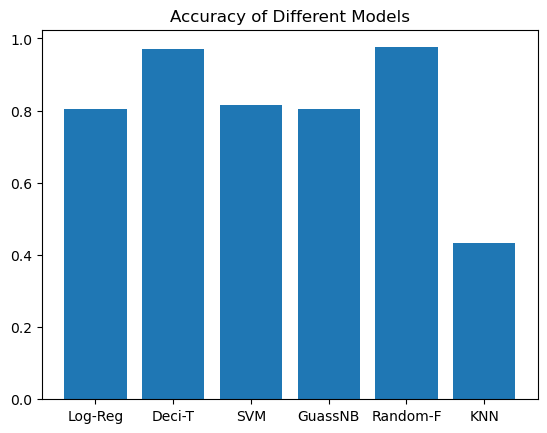

In [66]:
# Create a barplot to compare the accuracies of the two models
acc = [accuracy_log, accuracy_dt, score_sv, score_nb, score_rf, score_knn]
models = ['Log-Reg', 'Deci-T', 'SVM', 'GuassNB', 'Random-F', 'KNN']
plt.bar(models, acc)
plt.title('Accuracy of Different Models')
plt.show()